In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests
import time
import math

In [2]:
master = pd.read_csv('master_timeseries.csv')

In [3]:
master=master.rename(columns={'Unnamed: 0':'Date'})

In [4]:
master=master.set_index('Date')

In [7]:
master.head(10)

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,63.519070,18.229385,NaN,8.74,33.871223,10.193225,37.090000,9.70,39.404591,10.778428,...,42.315849,14.500958,19.541086,20.047621,NaN,19.480558,28.670000,55.943844,12.080154,NaN
2010-01-05,63.121239,18.082108,NaN,8.53,34.080551,10.211267,37.700001,9.71,39.170380,10.668042,...,44.889477,14.328979,19.563721,19.794851,NaN,19.413939,28.620001,57.714798,12.506084,NaN
2010-01-06,64.016403,18.182526,NaN,8.40,34.442860,10.157144,37.619999,9.57,39.511925,10.557658,...,44.300659,14.356496,19.382580,19.660570,NaN,19.275148,28.400000,57.696159,13.593570,NaN
2010-01-07,64.062294,18.333153,NaN,8.40,34.410656,9.913588,36.889999,9.47,39.502171,10.565544,...,45.246735,14.294587,19.473154,19.463099,NaN,19.269602,27.690001,59.019741,15.116047,NaN
2010-01-08,64.513718,18.426876,NaN,8.23,34.273785,9.832404,36.689999,9.43,39.658298,10.865160,...,44.922569,14.301464,19.405233,19.747461,NaN,19.275148,27.600000,57.780052,14.871366,NaN
2010-01-09,64.513718,18.426876,NaN,8.23,34.273785,9.832404,36.689999,9.43,39.658298,10.865160,...,44.922569,14.301464,19.405233,19.747461,NaN,19.275148,27.600000,57.780052,14.871366,NaN
2010-01-10,64.513718,18.426876,NaN,8.23,34.273785,9.832404,36.689999,9.43,39.658298,10.865160,...,44.922569,14.301464,19.405233,19.747461,NaN,19.275148,27.600000,57.780052,14.871366,NaN
2010-01-11,64.253555,18.520599,NaN,8.08,34.241585,9.823382,36.209999,9.14,39.267963,10.936126,...,44.776997,14.439042,19.880728,19.542082,NaN,19.608242,27.690001,59.057018,14.961988,NaN
2010-01-12,64.307144,18.467043,NaN,7.89,34.024197,9.715136,35.660000,8.65,38.584877,10.809969,...,44.975479,14.611020,20.039242,18.997053,NaN,19.980204,27.660000,57.919865,14.545118,NaN


# ------------

In [8]:
ret_master = master.pct_change()

In [9]:
ret_master.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.006263,-0.008079,NaN,-0.024027,0.006180,0.001770,0.016446,0.001031,-0.005944,-0.010241,...,0.060819,-0.011860,0.001158,-0.012608,NaN,-0.003420,-0.001744,0.031656,0.035259,NaN
2010-01-06,0.014182,0.005553,NaN,-0.015240,0.010631,-0.005300,-0.002122,-0.014418,0.008719,-0.010347,...,-0.013117,0.001920,-0.009259,-0.006784,NaN,-0.007149,-0.007687,-0.000323,0.086956,NaN
2010-01-07,0.000717,0.008284,NaN,0.000000,-0.000935,-0.023979,-0.019405,-0.010449,-0.000247,0.000747,...,0.021356,-0.004312,0.004673,-0.010044,NaN,-0.000288,-0.025000,0.022941,0.112000,NaN
2010-01-08,0.007047,0.005112,NaN,-0.020238,-0.003978,-0.008189,-0.005422,-0.004224,0.003952,0.028358,...,-0.007164,0.000481,-0.003488,0.014610,NaN,0.000288,-0.003250,-0.021005,-0.016187,NaN


master = actual price

ret_master = % change in price

Text(0, 0.5, 'Risk')

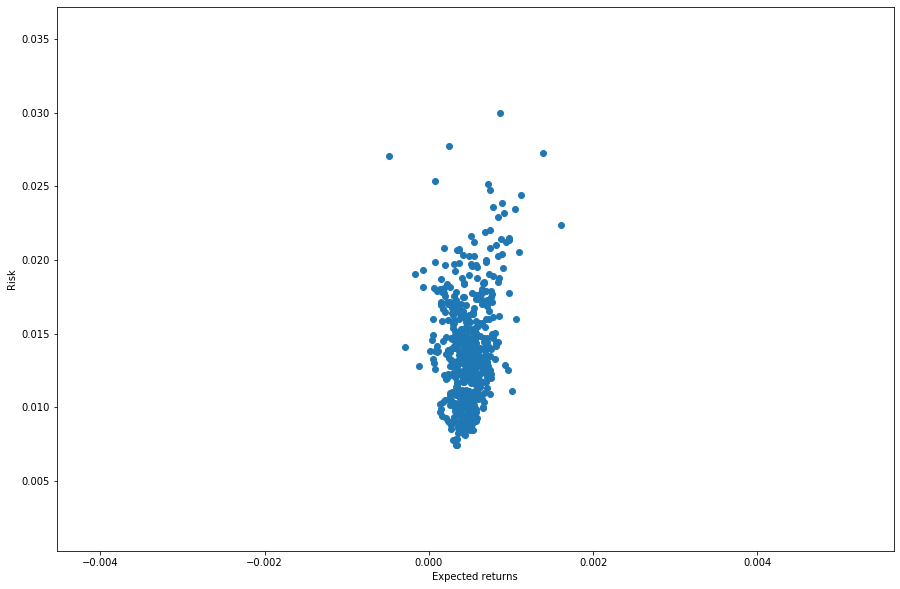

In [42]:
fig, ax = plt.subplots(figsize = (15,10))

plt.scatter(ret_master.mean(), ret_master.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
# for label, x, y in zip(ret_master.columns, ret_master.mean(), ret_master.std()):
#     plt.annotate(
#         label, 
#         xy = (x, y), xytext = (20, -20),
#         textcoords = 'offset points', ha = 'right', va = 'bottom',
#         bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
#         arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Creating Univariate DF (Microsoft)

In [5]:
msft_df=pd.DataFrame(master['MSFT'])

Text(0.5, 1.0, 'Microsoft Adjusted Price')

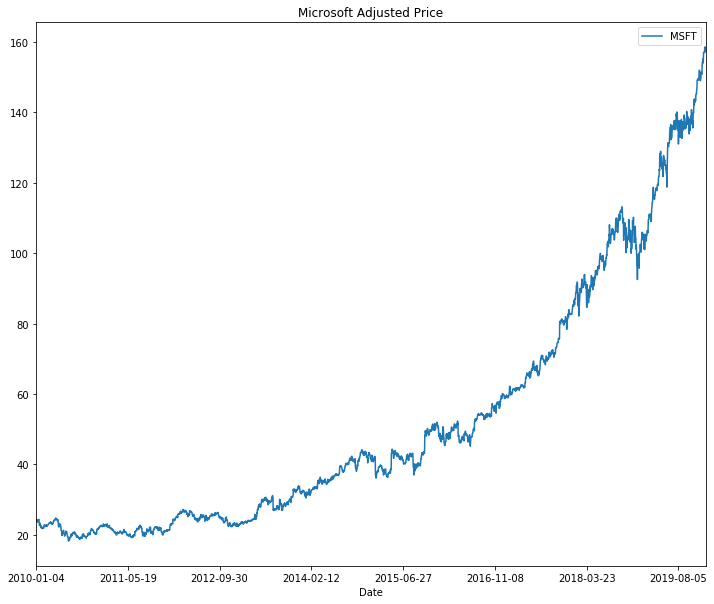

In [13]:
#plot of data to see visualize trends
msft_df.plot(figsize = [12,10])
plt.title('Microsoft Adjusted Price')

# ARIMA

###### Log transform to deal with unequal variance

In [28]:
msft_df.head()

,MSFT
Date,
2010-01-04,24.294369
2010-01-05,24.302216
2010-01-06,24.153070
2010-01-07,23.901886
2010-01-08,24.066734


In [6]:
msft_df_log=msft_df['MSFT'].transform(np.log)

##### Differencing

In [16]:
#Differencing
diff = pd.DataFrame(msft_df_log.diff())

In [31]:
diff.head()

,MSFT
Date,
2010-01-04,NaN
2010-01-05,0.000323
2010-01-06,-0.006156
2010-01-07,-0.010454
2010-01-08,0.006873


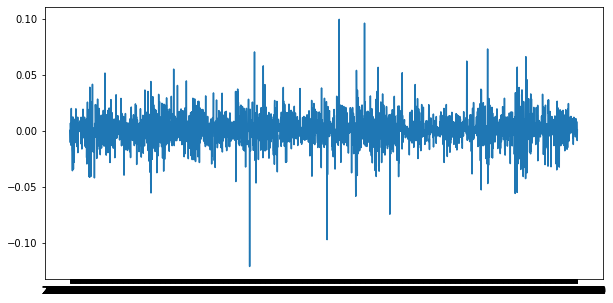

In [32]:
plt.figure(figsize=(10,5))
plt.plot(diff)

In [33]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
test = adfuller(diff['MSFT'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -25.166773
p-value                           0.000000
#Lags Used                        6.000000
Number of Observations Used    3640.000000
dtype: float64


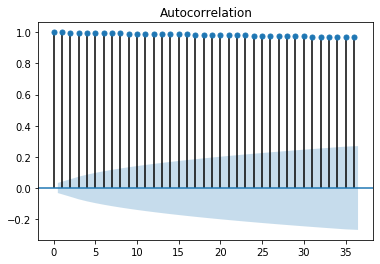

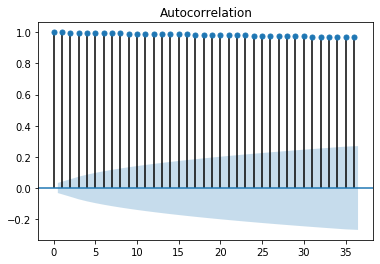

In [34]:
#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(msft_df_log[:-1], alpha=.05)

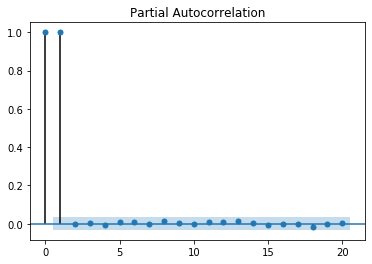

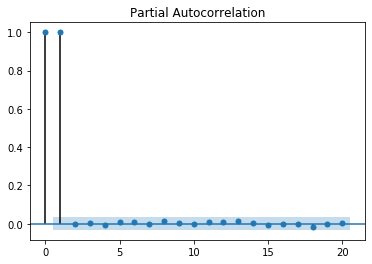

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(msft_df_log[:-1], alpha=.05, lags=20)

###### Model

In [56]:
#divide into train and validation set
train = msft_df_log[:int(0.8*(len(msft_df_log)))]
valid = msft_df_log[int(0.8*(len(msft_df_log))):]

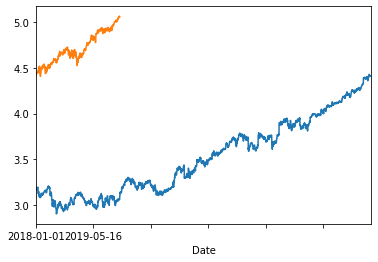

In [76]:
#plotting the data
train.plot()
valid.plot()

In [71]:
from statsmodels.tsa.arima_model import ARIMA
#fit ARIMA model (3,1,0))

model = ARIMA(train,order=(1,1,0)) 
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.MSFT   No. Observations:                 2918
Model:                 ARIMA(1, 1, 0)   Log Likelihood                8851.343
Method:                       css-mle   S.D. of innovations              0.012
Date:                Tue, 03 Mar 2020   AIC                         -17696.686
Time:                        15:56:05   BIC                         -17678.750
Sample:                    01-05-2010   HQIC                        -17690.225
                         - 12-31-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      1.939      0.053   -4.62e-06       0.001
ar.L1.D.MSFT     0.0032      0.019      0.175      0.861      -0.033       0.040
                                    Roots   

/Users/eharacz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/eharacz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [72]:
forecast_master = model_fit.forecast(len(valid))
forecast = pd.DataFrame(forecast_master[0],index = valid.index,columns=['Prediction'])
stderr = pd.DataFrame(forecast_master[1],index = valid.index,columns=['Standard Error'])
conf_int = pd.DataFrame(forecast_master[2],index = valid.index,columns=['Confidence Interval1','Confidence Interval2'])


In [73]:
forecast

,Prediction
Date,
2018-01-01,4.414834
2018-01-02,4.415253
2018-01-03,4.415673
2018-01-04,4.416092
2018-01-05,4.416512
...,...
2019-12-27,4.718985
2019-12-28,4.719404
2019-12-29,4.719824


In [74]:
real_forecast = forecast['Prediction'].transform(math.exp) 

In [75]:
real_forecast

Date
2018-01-01     82.668106
2018-01-02     82.702794
2018-01-03     82.737496
2018-01-04     82.772214
2018-01-05     82.806945
                 ...    
2019-12-27    112.054439
2019-12-28    112.101458
2019-12-29    112.148497
2019-12-30    112.195555
2019-12-31    112.242633
Name: Prediction, Length: 730, dtype: float64

In [69]:
error = math.sqrt(mean_squared_error(valid,real_forecast))
print(error)

133.9622374598027


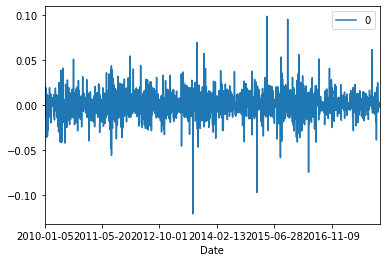

In [42]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

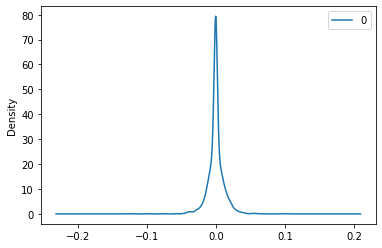

In [43]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
plt.show()

# Auto-ARIMA

In [212]:
#pip install pmdarima

  Using cached https://files.pythonhosted.org/packages/02/bc/7a984c74719596308611d502b3b375a82927e6103c8f8d40f0365da1dcc9/pmdarima-1.5.3-cp37-cp37m-macosx_10_15_x86_64.whl
     |████████████████████████████████| 15.1MB 25.8MB/s eta 0:00:01   |████████████▏                   | 5.8MB 3.6MB/s eta 0:00:03     |███████████████████▎            | 9.1MB 3.6MB/s eta 0:00:02     |████████████████████            | 9.5MB 3.6MB/s eta 0:00:02
     |████████████████████████████████| 8.4MB 21.3MB/s eta 0:00:01
  Found existing installation: numpy 1.17.2
    Uninstalling numpy-1.17.2:
      Successfully uninstalled numpy-1.17.2
  Found existing installation: statsmodels 0.10.1
    Uninstalling statsmodels-0.10.1:
      Successfully uninstalled statsmodels-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [46]:
train1 = msft_df[:int(0.8*(len(msft_df_log)))]
valid1 = msft_df[int(0.8*(len(msft_df_log))):]

In [183]:
#train3 = noc_df[:int(0.8*(len(noc_df)))]
#valid3 = noc_df[int(0.8*(len(noc_df))):]

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=3436.885, BIC=3472.755, Time=13.555 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=5511.701, BIC=5523.658, Time=0.964 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=4656.996, BIC=4674.931, Time=1.263 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=3432.387, BIC=3450.322, Time=5.986 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=5509.701, BIC=5515.679, Time=0.171 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=3434.155, BIC=3464.046, Time=6.824 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); 

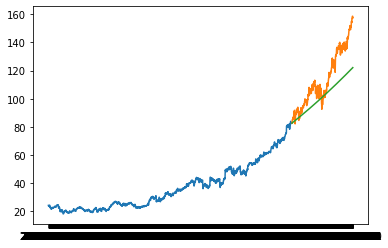

In [47]:
# Fit your model
import pmdarima as pm
model = pm.auto_arima(train1, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train1)

forecast = model.predict(n_periods=len(valid1))
forecast = pd.DataFrame(forecast,index = valid1.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train1, label='Train')
plt.plot(valid1, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [48]:
comp_df = valid1.merge(forecast,left_index=True, right_index=True)

In [49]:
comp_df['Error'] = comp_df['MSFT'] - comp_df['Prediction']

In [50]:
pd.set_option('display.max_rows', 500)

In [51]:
comp_df.tail()

,MSFT,Prediction,Error
Date,,,
2019-12-27,158.527008,121.810654,36.716354
2019-12-28,158.527008,121.871312,36.655696
2019-12-29,158.527008,121.931988,36.595020
2019-12-30,157.160736,121.992683,35.168053
2019-12-31,157.270432,122.053396,35.217035


In [53]:
forecast.tail()

,Prediction
Date,
2019-12-27,121.810654
2019-12-28,121.871312
2019-12-29,121.931988
2019-12-30,121.992683
2019-12-31,122.053396


In [54]:
from sklearn.metrics import mean_squared_error

rms = math.sqrt(mean_squared_error(valid1,forecast))
print(rms)

15.445607658639732


In [151]:
# reverse the log to inspect actual price prediction
real_forecast = forecast['Prediction'].transform(math.exp)

In [162]:
real_forecast

Date
2018-01-01     82.668216
2018-01-02     82.702902
2018-01-03     82.737602
2018-01-04     82.772317
2018-01-05     82.807047
                 ...    
2019-12-27    112.052345
2019-12-28    112.099360
2019-12-29    112.146395
2019-12-30    112.193449
2019-12-31    112.240523
Name: Prediction, Length: 730, dtype: float64